In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-02-13,64437
2020-02-14,67100
2020-02-15,69197
2020-02-16,71329
2020-02-17,73332


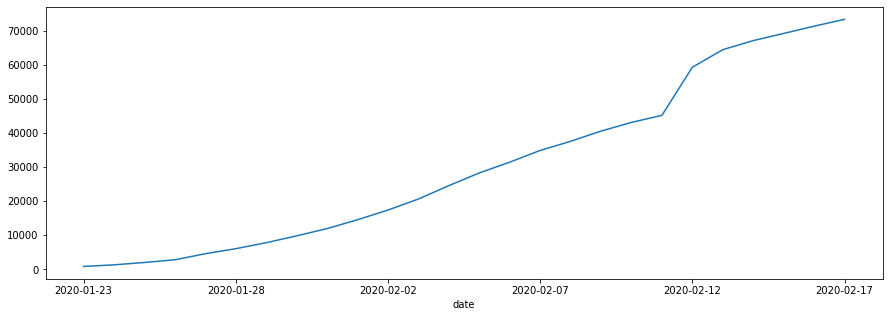

In [5]:
data.infected.plot(figsize=(15, 5))

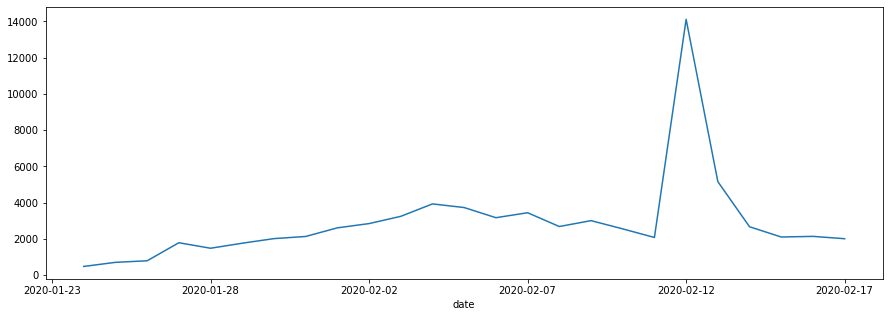

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=466.312, BIC=468.750, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0); AIC=466.947, BIC=470.604, Fit time=0.351 seconds
Fit ARIMA: order=(0, 1, 1); AIC=466.987, BIC=470.644, Fit time=0.402 seconds
Fit ARIMA: order=(1, 1, 1); AIC=473.576, BIC=478.451, Fit time=0.880 seconds
Total fit time: 2.210 seconds


In [9]:
stepwise_model.aic()

466.31208920698793

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 60
firstPredictionDay = datetime.datetime(2020,2,18)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-02-18 - 76231
2020-02-19 - 79130
2020-02-20 - 82030
2020-02-21 - 84929
2020-02-22 - 87829
2020-02-23 - 90728
2020-02-24 - 93628
2020-02-25 - 96527
2020-02-26 - 99427
2020-02-27 - 102326
2020-02-28 - 105226
2020-02-29 - 108125
2020-03-01 - 111025
2020-03-02 - 113924
2020-03-03 - 116824
2020-03-04 - 119723
2020-03-05 - 122623
2020-03-06 - 125522
2020-03-07 - 128422
2020-03-08 - 131321
2020-03-09 - 134221
2020-03-10 - 137120
2020-03-11 - 140020
2020-03-12 - 142919
2020-03-13 - 145818
2020-03-14 - 148718
2020-03-15 - 151617
2020-03-16 - 154517
2020-03-17 - 157416
2020-03-18 - 160316
2020-03-19 - 163215
2020-03-20 - 166115
2020-03-21 - 169014
2020-03-22 - 171914
2020-03-23 - 174813
2020-03-24 - 177713
2020-03-25 - 180612
2020-03-26 - 183512
2020-03-27 - 186411
2020-03-28 - 189311
2020-03-29 - 192210
2020-03-30 - 195110
2020-03-31 - 198009
2020-04-01 - 200909
2020-04-02 - 203808
2020-04-03 - 206708
2020-04-04 - 209607
2020-04-05 - 212507
2020-04-06 - 215406
2020-04-07 - 218306
2020-04-0